# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude

from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [24]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
pprint(cities)

Number of cities in the list: 637
['margaret river',
 'bethel',
 'san antonio del estrecho',
 'union choco',
 'dakoro',
 'mount isa',
 'puerto ayora',
 'orchard homes',
 'poxoreo',
 'edinburgh of the seven seas',
 'haverfordwest',
 'port-aux-francais',
 'petropavlovsk-kamchatsky',
 'taiohae',
 'bandarbeyla',
 'adamstown',
 'balakliya',
 'coahuayana de hidalgo',
 'la passe',
 'nova vicosa',
 'blackmans bay',
 'diffa',
 'thunder bay',
 'dong ha',
 'longyearbyen',
 'invercargill',
 'garissa',
 'carbonear',
 'byron bay',
 'shahrak',
 'port lincoln',
 'abadeh',
 'olonkinbyen',
 'badger',
 'grytviken',
 'waitangi',
 'savave village',
 'nouadhibou',
 'manokwari',
 'komatsu',
 'i-n-salah',
 'port mathurin',
 'hamilton',
 'armacao de buzios',
 'punta arenas',
 'pokhara',
 'wotho',
 'dudinka',
 'holualoa',
 'xinyang',
 'san julian',
 'xilin hot',
 'bredasdorp',
 'lihue',
 'hede',
 'akrehamn',
 'thompson',
 'floro',
 'burang',
 'albany',
 'namdrik',
 'san antonio de pale',
 'port macquarie',
 'pa

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [26]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
url = f"{base_url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | margaret river
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | san antonio del estrecho
City not found. Skipping...
Processing Record 4 of Set 1 | union choco
City not found. Skipping...
Processing Record 5 of Set 1 | dakoro
Processing Record 6 of Set 1 | mount isa
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | orchard homes
Processing Record 9 of Set 1 | poxoreo
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | haverfordwest
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | petropavlovsk-kamchatsky
Processing Record 14 of Set 1 | taiohae
City not found. Skipping...
Processing Record 15 of Set 1 | bandarbeyla
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | balakliya
Processing Record 18 of Set 1 | coahuayana de hidalgo
Processing Record 19 of Set 1 |

In [27]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          611
Lat           611
Lng           611
Max Temp      611
Humidity      611
Cloudiness    611
Wind Speed    611
Country       611
Date          611
dtype: int64

In [28]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,margaret river,-33.9500,115.0667,10.53,70,100,11.77,AU,1696200834
1,bethel,41.3712,-73.4140,22.47,79,0,1.89,US,1696200678
2,dakoro,14.5106,6.7650,28.59,50,56,6.18,NE,1696200834
3,mount isa,-20.7333,139.5000,26.87,26,1,4.12,AU,1696200834
4,puerto ayora,-0.7393,-90.3518,29.98,93,96,2.24,EC,1696200834


In [31]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [32]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,10.53,70,100,11.77,AU,1696200834
1,bethel,41.3712,-73.4140,22.47,79,0,1.89,US,1696200678
2,dakoro,14.5106,6.7650,28.59,50,56,6.18,NE,1696200834
3,mount isa,-20.7333,139.5000,26.87,26,1,4.12,AU,1696200834
4,puerto ayora,-0.7393,-90.3518,29.98,93,96,2.24,EC,1696200834


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

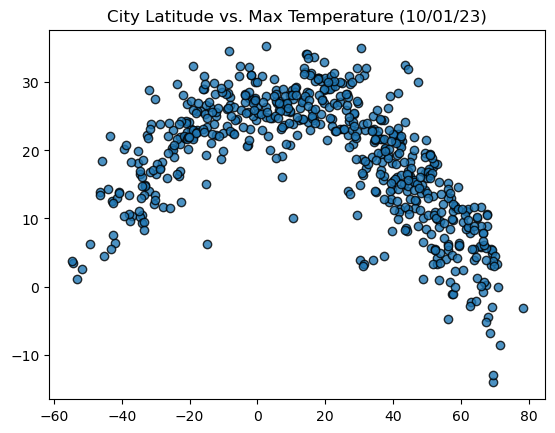

In [33]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], 
            city_data_df["Max Temp"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

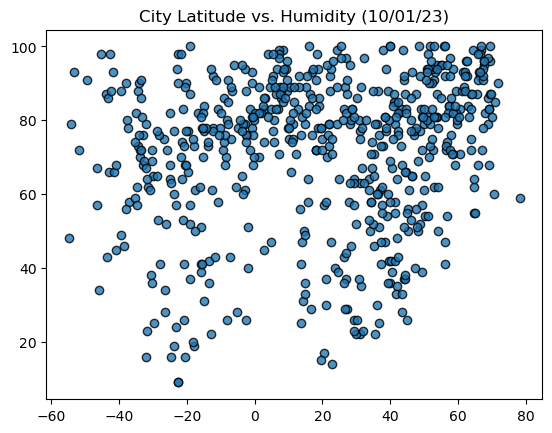

In [34]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], 
            city_data_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

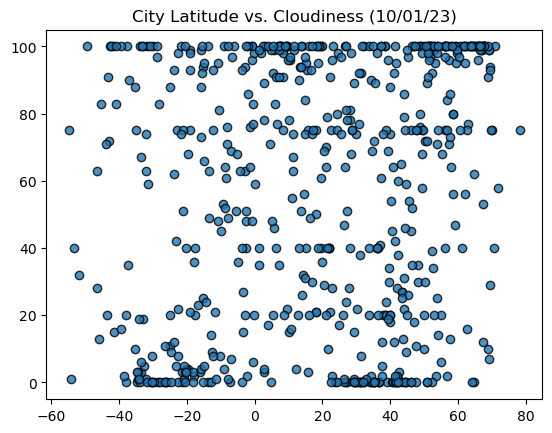

In [35]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], 
            city_data_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

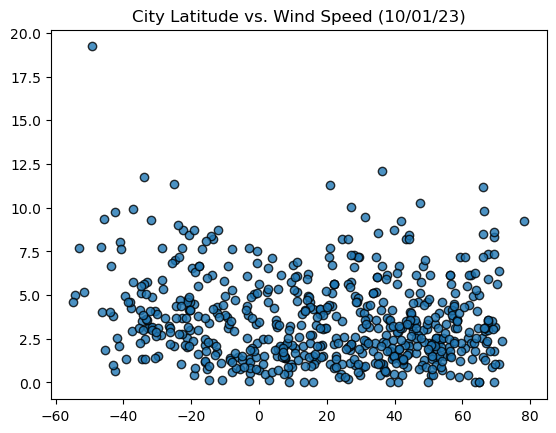

In [36]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], 
            city_data_df["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [37]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    # Incorporate the other graph properties
    plt.xlabel('Latitude')
    plt.ylabel(title)
    
    # Print r square value
    print(f"The r-squared is: {r_value**2}")
    
    # Show plot
    plt.show()

In [38]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bethel,41.3712,-73.4140,22.47,79,0,1.89,US,1696200678
2,dakoro,14.5106,6.7650,28.59,50,56,6.18,NE,1696200834
5,orchard homes,46.8633,-114.0484,12.55,76,100,4.63,US,1696200834
8,haverfordwest,51.8017,-4.9691,17.53,100,100,3.35,GB,1696200835
10,petropavlovsk-kamchatsky,53.0452,158.6483,3.33,100,100,4.00,RU,1696200835


In [39]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,10.53,70,100,11.77,AU,1696200834
3,mount isa,-20.7333,139.5000,26.87,26,1,4.12,AU,1696200834
4,puerto ayora,-0.7393,-90.3518,29.98,93,96,2.24,EC,1696200834
6,poxoreo,-15.8372,-54.3892,29.03,51,73,1.17,BR,1696200835
7,edinburgh of the seven seas,-37.0676,-12.3116,10.41,58,90,9.93,SH,1696200835


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.6574843995159559


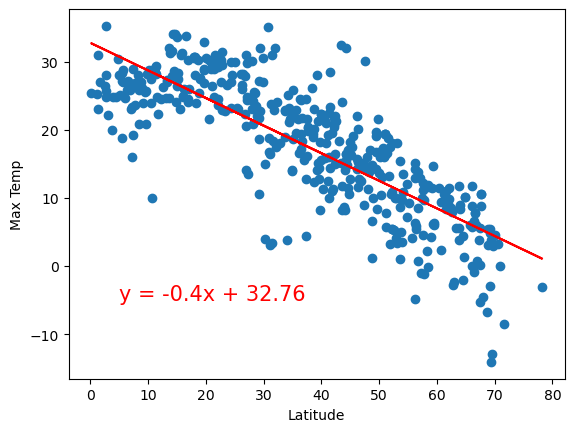

In [50]:
# Linear regression on Northern Hemisphere
# Max Temp vs. Latitude
# Display r-value
# Display the y line equation

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
text_coordinates = (5,-5)
plot_linear_regression(x_values, y_values, 'Max Temp', text_coordinates)



The r-squared is: 0.6119578170828581


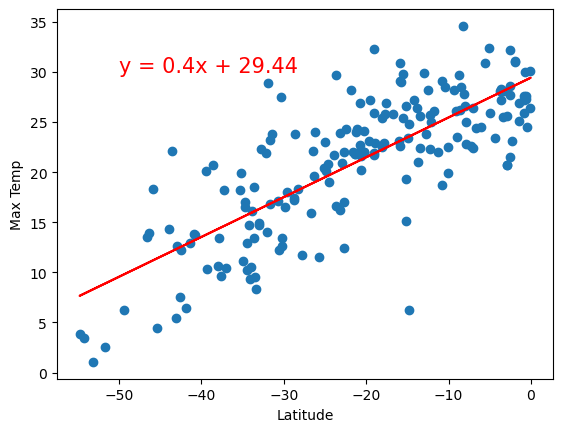

In [51]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
text_coordinates = (-50,30)
plot_linear_regression(x_values, y_values, 'Max Temp',text_coordinates)


**Discussion about the linear relationship: In these plots we can see that temperature and latitude are strongly correlated. As we get further from 0 degrees latitude, the equator, the max temperature decreases.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.009337412636855572


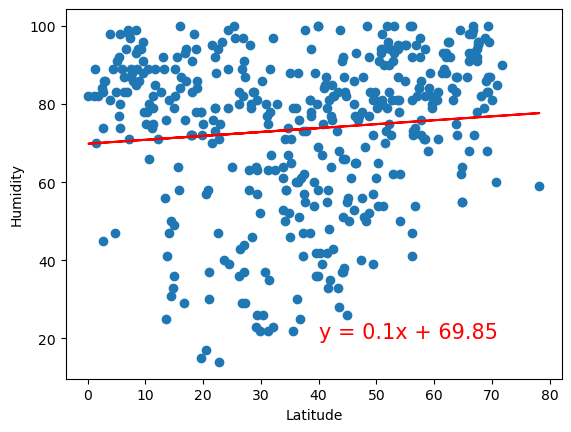

In [53]:
# Northern Hemisphere
# Humidity (%) vs. Latitude

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"] 
text_coordinates = (40,20)
plot_linear_regression(x_values, y_values, 'Humidity',text_coordinates)

The r-squared is: 0.0027936679571038342


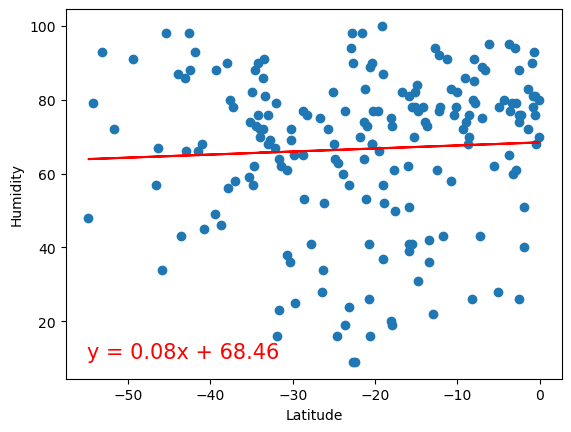

In [58]:
# Southern Hemisphere
# Humidity (%) vs. Latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
text_coordinates = (-55,10)
plot_linear_regression(x_values, y_values, 'Humidity',text_coordinates)

**Discussion about the linear relationship: Given the very low r values we see that latitude and humidity are very weakly correlated.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.009009405360184167


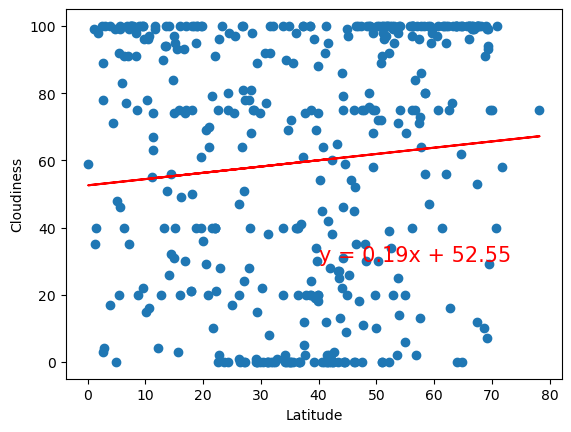

In [59]:
# Northern Hemisphere
# Cloudiness (%) vs. Latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
text_coordinates = (40,30) 
plot_linear_regression(x_values, y_values, 'Cloudiness',text_coordinates)

The r-squared is: 0.006217027828591061


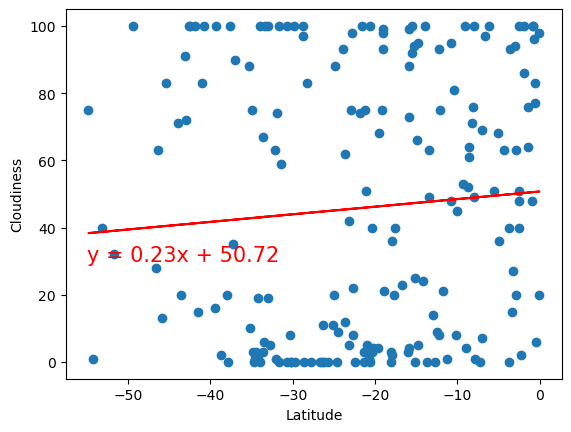

In [60]:
# Southern Hemisphere
# Cloudiness (%) vs. Latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
text_coordinates = (-55,30)
plot_linear_regression(x_values, y_values, 'Cloudiness',text_coordinates)   

**Discussion about the linear relationship: Again we see a very weak correlation between cloudiness and latitude. Though these plots do show that there seems to be a tendancy toward the maximum and minimum values. I would question the method of collecting cloudiness data.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0037107645848014114


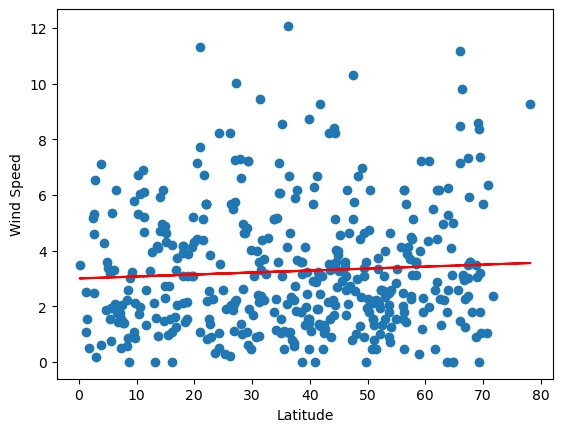

In [61]:
# Northern Hemisphere
# Wind Speed (mph) vs. Latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
text_coordinates = (0,30)
plot_linear_regression(x_values, y_values, 'Wind Speed',text_coordinates)


The r-squared is: 0.0772597419099808


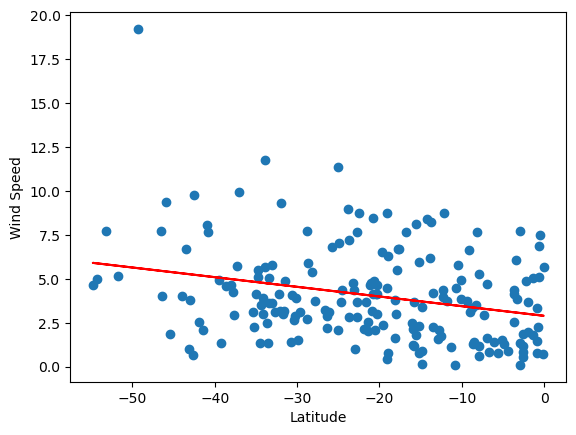

In [62]:
# Southern Hemisphere
# Wind Speed (mph) vs. Latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
text_coordinates = (-55,25)
plot_linear_regression(x_values, y_values, 'Wind Speed',text_coordinates)

**Discussion about the linear relationship: This shows a weak correlation between latitude and windspeed. With windspeed slightly trending up as you move away from the equator.